# Gráficas 

## 0. Introducción
(Insertar intro)

## 1. Cargar librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Cargar datos (Data)

### **- [Data Product 1](Data/TOTAL_vacunados_y_fallecidos_x_semanaEpi.csv):** Total de vacunados y fallecidos por COVID-19 por cada semana epidemiológica a nivel nacional.

In [4]:
vac_fal_semEpi = pd.read_csv("Data/TOTAL_vacunados_y_fallecidos_x_semanaEpi.csv")

Agregamos: 

In [5]:
# Add cumulative of deceased and vaccinated
vac_fal_semEpi['deceased_cum'] = vac_fal_semEpi['deceased'].cumsum()
vac_fal_semEpi['vaccinated_cum'] = vac_fal_semEpi['vaccinated'].cumsum()

# Add the vaccinated percentage of the population nationwide (32.970.000 no inhabitants)
vac_fal_semEpi['vac_per_x_pop'] = ((vac_fal_semEpi['vaccinated_cum']*100)/32970000)

# Add a new col of percentages of each row from any variable
def colPercent(dataset, new_name, col_name):
    dataset[new_name] = (dataset[col_name] / dataset[col_name].sum()) * 100

# Add the total percetange of deceaced and vaccinated to our data
colPercent(vac_fal_semEpi, "deceased_%", "deceased")
colPercent(vac_fal_semEpi, "vaccinated_%", "vaccinated")

# Total of deceased and vaccinated
print("Total fallecidos: " + str(sum(vac_fal_semEpi["deceased"])))
print("Total vacunados: " + str(sum(vac_fal_semEpi["vaccinated"])) + "\n")

print(vac_fal_semEpi.head())

Total fallecidos: 200246
Total vacunados: 15676507

   epi_year  epi_week  deceased  vaccinated  deceased_cum  vaccinated_cum  \
0      2020        10         2           0             2               0   
1      2020        11         3           0             5               0   
2      2020        12        30           0            35               0   
3      2020        13        62           0            97               0   
4      2020        14       223           0           320               0   

   vac_per_x_pop  deceased_%  vaccinated_%  
0            0.0    0.000999           0.0  
1            0.0    0.001498           0.0  
2            0.0    0.014982           0.0  
3            0.0    0.030962           0.0  
4            0.0    0.111363           0.0  


### **- [Data Product 2](Data/fallecidos_x_departamentos_x_semanasEpi.csv):** Número de fallecidos por COVID-19 por semana epidemiológica de cada departamento.

In [6]:
fal_dep_semEpi = pd.read_csv('Data/fallecidos_x_departamentos_x_semanasEpi.csv')

### **- [Data Product 3](Data/TOTAL_vacunados_y_fallecidos_x_semanaEpi.csv):** Total de fallecidos, vacunados, tasa de mortalidad por 100.000 habitantes y porcentaje de vacunación contra COVID-19 de cada departamento.

In [7]:
fal_vac_dep = pd.read_csv('Data/TOTAL_vacunados_y_fallecidos_x_departamento.csv')

### **- [Data Product 4](Data/vacunados_x_departamentos_x_semanaEpi.csv):** Número de vacunados contra COVID-19 por semana epidemiológica de cada departamento.

In [8]:
vac_dep_semEpi = pd.read_csv('Data/vacunados_x_departamentos_x_semanaEpi.csv')

## 3. Gráfica de TOTAL de fallecidos por COVID-19 por semana epidemiológica en Perú

Fecha de la segunda ola tomada del [Documento Técnico: Plan Nacional Actualizado de Vacunación contra la COVID-19](https://cdn.www.gob.pe/uploads/document/file/1805113/Plan%20Nacional%20Actualizado%20contra%20la%20COVID-19.pdf)

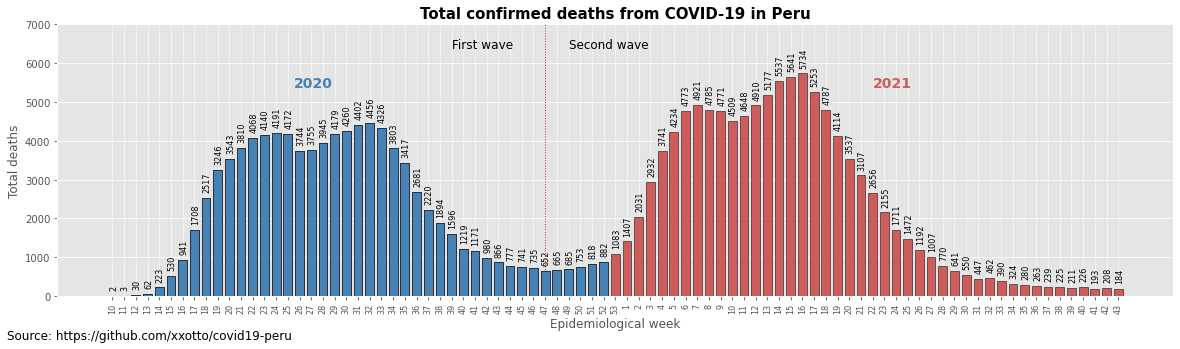

In [9]:
def barplot_dec(df):

    plt.figure(figsize=(20, 5)) # Create a figure
    plt.style.use('ggplot') # Using the style for the plot
    
    width = 0.75 # Bar width
    x = np.arange(len(df["epi_week"]))
    a = plt.bar(x, df["deceased"], width, color="indianred", edgecolor="black", zorder=2)  # Create bars
    plt.bar(np.arange(0,43), df["deceased"].iloc[0:43], width, color="steelblue", edgecolor="black", zorder=3) 
    
    plt.xticks(x, df["epi_week"], rotation = 90)  # Create names on the x-axis
    plt.yticks(np.arange(0, 7500, 1000))  # Range on y axis

    plt.title("Total confirmed deaths from COVID-19 in Peru", fontsize=15, weight="bold")
    plt.xlabel("Epidemiological week", fontsize=12)
    plt.ylabel("Total deaths", fontsize = 12)
    plt.tick_params(axis="x", labelsize = 8)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2 +.09, 150 + height,
                    '%d' % int(height), ha='center', va='bottom',
                    rotation = 90, fontsize=8)

    autolabel(a)

    plt.text(15.5, 5375, r"2020", fontsize=14, color = "steelblue", weight="bold")
    plt.text(65, 5375, r"2021", fontsize=14, color="indianred", weight="bold")

    plt.text(29, 6375, r"First wave", fontsize=12)
    plt.text(39, 6375, r"Second wave", fontsize=12)

    # In week 47 start the new wave (01/12/2020)
    plt.axvline(x=37, color="brown", linestyle=":", linewidth=1, zorder=1)  

    plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
    plt.rcParams["axes.axisbelow"] = True

    plt.text(-9, -1100, r"Source: https://github.com/xxotto/covid19-peru", fontsize=12)

    plt.savefig('Images/covid19-peru_fallecidos_x_semanaEpi.png', bbox_inches='tight') # Save figure
    plt.show() # Plot figure

barplot_dec(vac_fal_semEpi)

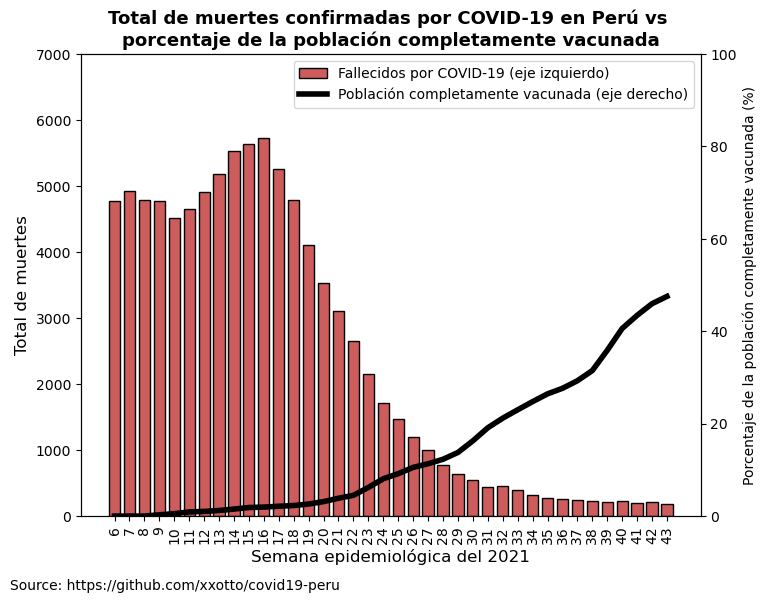

In [211]:
def barplot_dec(df):

    fig = plt.figure(figsize=(8, 6)) # Create a figure
    ax = fig.add_subplot(111)
    plt.style.use('default') # Using the style for the plot
    
    # Fallecidos desde que empezó la jornada de vacunación en semana epi 5 del 2021
    fal = df["deceased"].iloc[49:]
    
    # Primera gráfica de barras
    width = 0.75 # Bar width
    x = np.arange(len(fal))
    ax.bar(x, fal, width, color="indianred", edgecolor="black", zorder=2,
                    label='Fallecidos por COVID-19 (eje izquierdo)') 
    
    plt.xticks(x, df["epi_week"].iloc[49:], rotation = 90) 
    plt.yticks(np.arange(0, 7500, 1000))
    plt.ylabel("Total de muertes", fontsize = 12)
    plt.tick_params(axis="x", labelsize = 10)

    plt.title("Total de muertes confirmadas por COVID-19 en Perú vs \nporcentaje de la población completamente vacunada",
              fontsize=13, weight="bold")
    plt.xlabel("Semana epidemiológica del 2021", fontsize=12)
    # Segunda gráfica de frecuencia acumulada de fallecidos
    ax2 = plt.twinx()
    ax2.plot(x, vac_fal_semEpi['vac_per_x_pop'].iloc[49:], color='black', linestyle="-", linewidth=4, 
            label='Población completamente vacunada (eje derecho)')
    ax2.set_ylim(0,100,10)

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    ax2.set_ylabel('Porcentaje de la población completamente vacunada (%)')

    plt.text(-7, -16, r"Source: https://github.com/xxotto/covid19-peru", fontsize=10)

    plt.savefig('Images/covid19-peru_fallecidos_vs_vacunados_x_semanaEpi.png', bbox_inches='tight') # Save figure
    plt.show() # Plot figure

barplot_dec(vac_fal_semEpi)

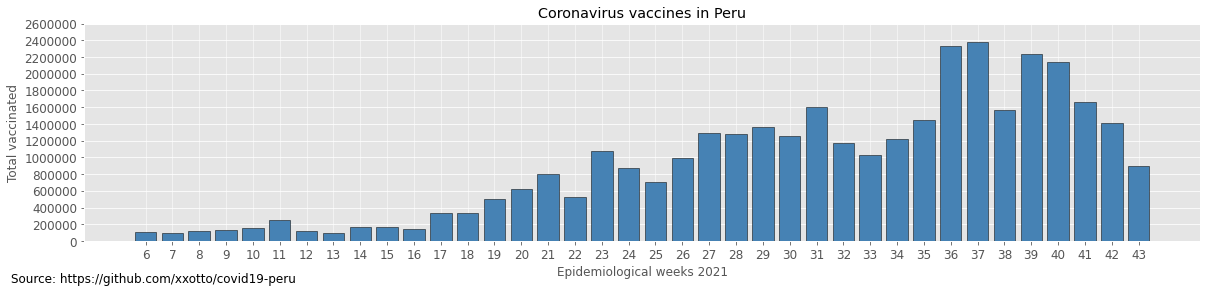

In [28]:
# Barplot of TOTAL VACCINATED
def barplot_vac(df):

    # Create a figure
    plt.figure(figsize=(20, 4))

    # Using the style for the plot
    plt.style.use('ggplot')

    y_position = np.arange(len(df["epi_week"].iloc[49:]))

    plt.tick_params(axis="x", labelsize=12)
    plt.tick_params(axis="y", labelsize=12)

    plt.bar(y_position, df["vaccinated"].iloc[49:], color="steelblue", edgecolor="black")  # Create bars
    plt.xticks(y_position, df["epi_week"].iloc[49:])  # Create names on the x-axis
    plt.yticks(np.arange(0, 2800000, 200000))
    plt.ticklabel_format(axis="y", style="plain")
    
    plt.title("Coronavirus vaccines in Peru")  # Labels
    plt.xlabel("Epidemiological weeks 2021")
    plt.ylabel("Total vaccinated")

    plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
    plt.rcParams["axes.axisbelow"] = True

    plt.text(-5, -500000, r"Source: https://github.com/xxotto/covid19-peru", fontsize=12)

    plt.savefig('Images/covid19-peru_vacunados_x_semanaEpi.png', bbox_inches='tight')
    plt.show()

barplot_vac(vac_fal_semEpi)

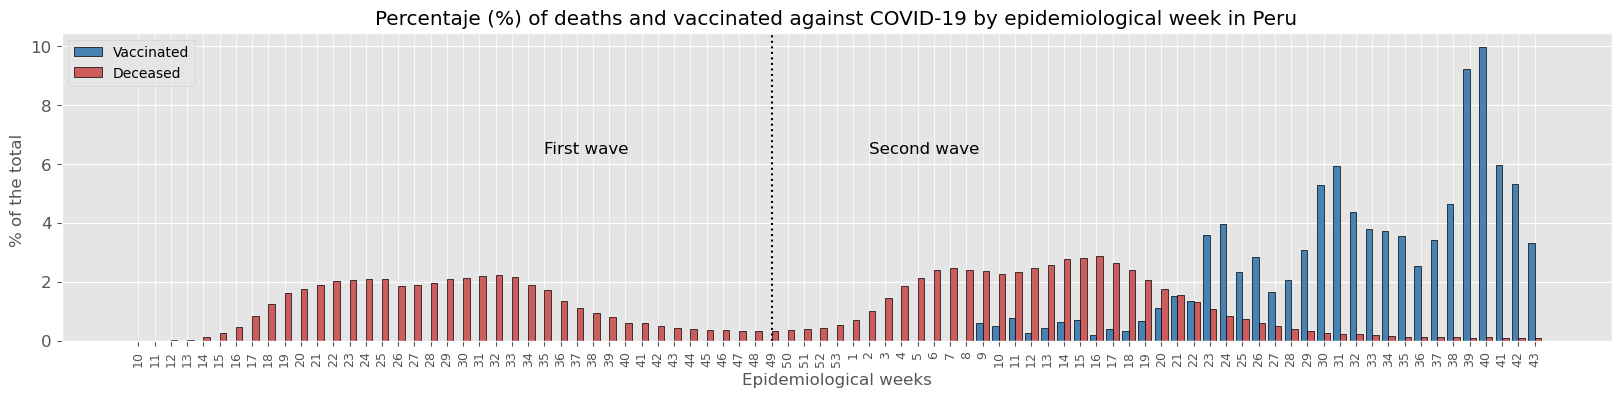

In [212]:
def barplot_epi(df):
       
       # Create a figure
       plt.figure(figsize=(20, 4))

       # Using the style for the plot
       plt.style.use('ggplot')

       x = np.arange(len(df['epi_week']))
       width = 0.40  # the width of the bars
       
       plt.bar(x - width/2, df['vaccinated_%'], width, label='Vaccinated', color = 'steelblue', edgecolor='black')
       plt.bar(x + width/2, df['deceased_%'], width, label='Deceased', color = 'indianred', edgecolor='black')
       
       # Add some text for labels, title and custom x-axis tick labels, etc.
       plt.ylabel('% of the total ')
       plt.xlabel('Epidemiological weeks')
       plt.title('Percentaje (%) of deaths and vaccinated against COVID-19 by epidemiological week in Peru')
       plt.xticks(x, df["epi_week"], rotation = 90)  # Create names on the x-axis

       plt.legend()
       plt.tick_params(axis='x', labelsize=9)
       plt.tick_params(axis='y', labelsize=12)

       plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
       plt.rcParams["axes.axisbelow"] = True
       
       # Plot line (01/12/2020 week 49, 2nd wave)
       plt.axvline(x=39, color='black', linestyle='dotted', linewidth=1.5)

       # Plot text
       plt.text(25, 6.35, r'First wave', fontsize=12)
       plt.text(45, 6.35, r'Second wave', fontsize=12)

       # Plot
       plt.savefig('Images/covid19-peru_proporcion_vacunados_fallecidos_x_semanaEpi.png', bbox_inches='tight')
       plt.show()
       
barplot_epi(vac_fal_semEpi)

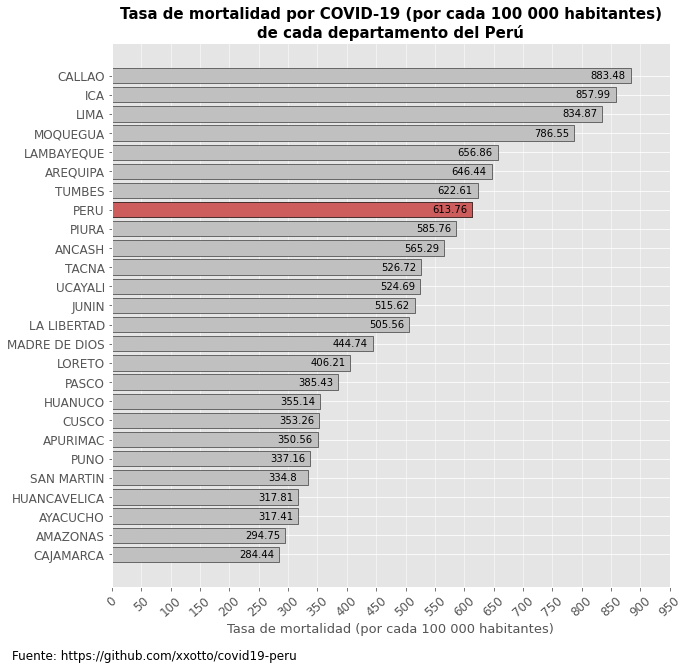

In [20]:
def barplot_dep(df):
     
    # Create a figure
    fig, ax = plt.subplots(figsize=(10,10))

    # Using the style for the plot
    plt.style.use('ggplot')

    # Create y positions
    y_pos = np.arange(len(df["departamento"]))
    df = df.sort_values(by=["tasa_mortalidad"])

    # Create bars
    bh = plt.barh(y_pos, df["tasa_mortalidad"], color="silver", edgecolor="black")
    plt.barh(18, df["tasa_mortalidad"].iloc[18], color="indianred", edgecolor="black")
    ax.bar_label(ax.containers[0], label_type= 'edge', padding=-40)

    # Create names on the x-axis
    plt.xticks(np.arange(0, 1000, 50),rotation = 42)
    plt.yticks(y_pos, df["departamento"], fontsize=12)

    # Labels
    plt.title("Tasa de mortalidad por COVID-19 (por cada 100 000 habitantes)\nde cada departamento del Perú",
             fontsize=15, weight="bold")
    plt.xlabel("Tasa de mortalidad (por cada 100 000 habitantes)", fontsize=13)
    plt.tick_params(axis="x", labelsize=12)

    #plt.axvline(x=613.7630085109, color="brown", linestyle="dashed", linewidth=.75)

    # Configure grid
    plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
    plt.rcParams["axes.axisbelow"] = True

    plt.text(-170, -5.5, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=12)
    
    # Show graphic
    plt.savefig('Images/covid19-peru_fallecidos_x_departamentos.png', bbox_inches='tight')
    plt.show()

barplot_dep(fal_vac_dep)

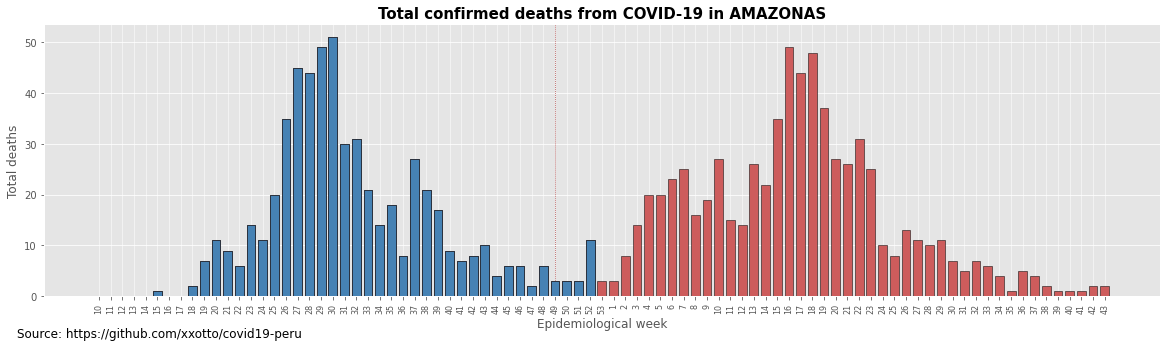

In [53]:
# Barplot of TOTAL DECEASED
def barplot_dec(df, dep_name):

    plt.figure(figsize=(20, 5))     # Create a figure
    plt.style.use('ggplot')         # Using the style for the plot
    
    width = 0.75                        # Width of bars
    x = np.arange(len(df["epi_week"]))  # x axis positions

    # The red bar is plotted first, then blue bar is plotted above
    bar = plt.bar(x, df[dep_name], width, color="indianred", edgecolor="black", zorder=2)
    plt.bar(np.arange(0,43), df[dep_name].iloc[0:43], width, color="steelblue", 
            edgecolor="black", zorder=3)
    
    # Bar names in 'x' and 'y' axis
    plt.xticks(x, df["epi_week"], rotation = 90)  # Create names on the x-axis
    plt.tick_params(axis="x", labelsize = 8)
    """ plt.yticks(np.arange(0, dep_df[ dep_name].max() + 
               round(10/100*dep_df[dep_name].max()), 
               10/100*dep_df[ dep_name].max()))  # Create names on the y-axis """

    # Total number in each bar
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2 +.09, 2 + height,
                    '%d' % int(height), ha='center', va='bottom',
                    rotation = 90, fontsize=8)

    # Title and labels
    plt.title("Total confirmed deaths from COVID-19 in " + str(dep_name), fontsize=15, weight="bold")
    plt.xlabel("Epidemiological week", fontsize=12)
    plt.ylabel("Total deaths", fontsize = 12)
    """
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2 +.09, 1.5 + height,
                    '%d' % int(height), ha='center', va='bottom',
                    rotation = 90, fontsize=8)
        print(height)
    autolabel(bar)"""
    
    
    # In week 49 start the new wave (01/12/2020)
    plt.axvline(x=39, color="brown", linestyle=":", linewidth=.75, zorder=1) 
    """
    plt.text(15.5, 5375, r"2020", fontsize=14, color = "steelblue", weight="bold")
    plt.text(65, 5375, r"2021", fontsize=14, color="indianred", weight="bold")

    plt.text(31.5, 6375, r"First wave", fontsize=12)
    plt.text(41, 6375, r"Second wave", fontsize=12)
    """
    """ ax2 = plt.twinx()
    ax2.plot(x, vac_fal_semEpi['deceased_cum'], color='black', linestyle="-", linewidth=.75)
    ax2.set_ylim(0,210000,15000)
    ax2.set_ylabel('Cumulative confirmed COVID-19 deaths') """

    plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
    plt.rcParams["axes.axisbelow"] = True

    plt.text(-7, -8, r"Source: https://github.com/xxotto/covid19-peru", fontsize=12)

    plt.show()

barplot_dec(fal_dep_semEpi, "AMAZONAS")
